<a href="https://colab.research.google.com/github/goudaChees/MLstudy/blob/master/0623~24(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression (Boston dataset)


In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [ ]:
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston.data.shape

(506, 13)

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(boston.DESCR) #대충 설명들

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) #데이터프레임화 하는 과정 
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA 데이터 탐색 과정

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = ['LSTAT','INDUS', 'NOX', 'RM', 'target']

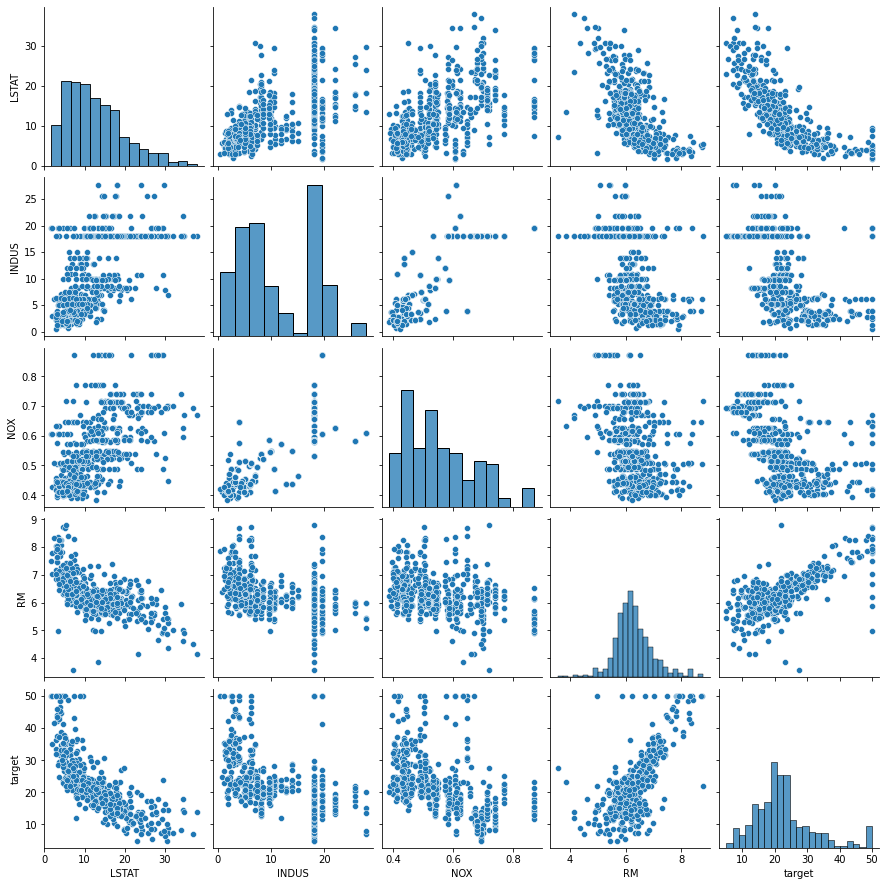

In [ ]:
sns.pairplot(df_boston[cols])

In [ ]:
cols

['LSTAT', 'INDUS', 'NOX', 'RM', 'target']

In [ ]:
df_boston[cols]

,LSTAT,INDUS,NOX,RM,target
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2
...,...,...,...,...,...
501,9.67,11.93,0.573,6.593,22.4
502,9.08,11.93,0.573,6.120,20.6
503,5.64,11.93,0.573,6.976,23.9
504,6.48,11.93,0.573,6.794,22.0


In [ ]:
df_boston[cols].values

array([[ 4.98 ,  2.31 ,  0.538,  6.575, 24.   ],
       [ 9.14 ,  7.07 ,  0.469,  6.421, 21.6  ],
       [ 4.03 ,  7.07 ,  0.469,  7.185, 34.7  ],
       ...,
       [ 5.64 , 11.93 ,  0.573,  6.976, 23.9  ],
       [ 6.48 , 11.93 ,  0.573,  6.794, 22.   ],
       [ 7.88 , 11.93 ,  0.573,  6.03 , 11.9  ]])

In [ ]:
df_boston[cols].values.T

array([[ 4.98 ,  9.14 ,  4.03 , ...,  5.64 ,  6.48 ,  7.88 ],
       [ 2.31 ,  7.07 ,  7.07 , ..., 11.93 , 11.93 , 11.93 ],
       [ 0.538,  0.469,  0.469, ...,  0.573,  0.573,  0.573],
       [ 6.575,  6.421,  7.185, ...,  6.976,  6.794,  6.03 ],
       [24.   , 21.6  , 34.7  , ..., 23.9  , 22.   , 11.9  ]])

In [ ]:
cm = np.corrcoef(df_boston[cols].values.T)


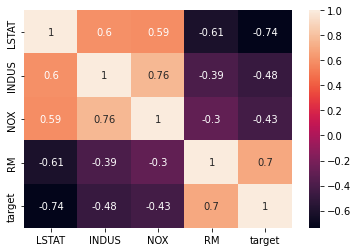

In [ ]:
hm = sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols, yticklabels=cols)

## Simple Linear Regression

In [ ]:
X = df_boston[['RM']].values # 데이터를 확인하는 과정이었다고함 대괄호가 두개인 이유는, 추후 확장성을 위해 [['RM','LSTAT',~~]]등을 위해 작성 

In [ ]:
y = df_boston['target'].values # 데이터를 확인하는 과정이었다고함

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
slr = LinearRegression()

In [ ]:
slr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('slope: ', slr.coef_[0]) #현재는 하나 뿐이라 0번 그러나 나중에는 1,2 등 index대로 뽑을 수 있다.
print('intercept : ', slr.intercept_) #절편?

slope:  8.46109163711589
intercept :  -30.571032410898322


In [ ]:
def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='blue', edgecolors='white')
    plt.plot(X, model.predict(X), color='black')

Text(0.5, 1.0, 'Training set')

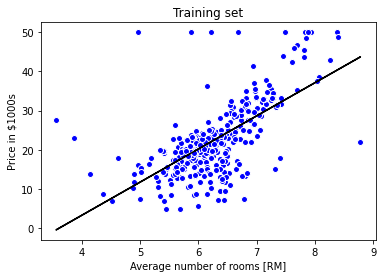

In [ ]:
lin_reg_plot(X_train, y_train, slr) #트레인은 어떠한가?
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s')
plt.title('Training set') #시각적인 부분, 라벨과 타이틀들

Text(0.5, 1.0, 'Training set')

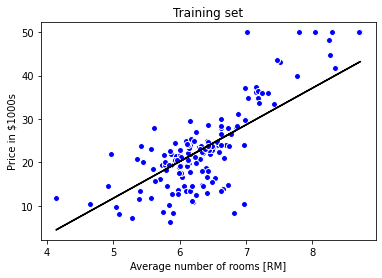

In [ ]:
lin_reg_plot(X_test, y_test, slr) #테스트 표본은 어떠한가 ?
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s')
plt.title('Training set') 

## Multiple Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df_boston.iloc[:, 0:-1].values

In [ ]:
X.shape

(506, 13)

In [ ]:
y = df_boston['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
scaler.fit(X_train) # fit(X_test) 를 새로 하는 것이 아니고, 
#기존에 돌렸던 모듈로 똑같은 조건(새로운 변수로 scaler를 또 만들면 조건이 달라질수도)으로 돌려야함

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlr = LinearRegression()

In [ ]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(X_test_scaled)

In [ ]:
# residual plots
def residual_plot(y_pred, y):
    plt.scatter(y_pred, y_pred-y, c="blue", marker='s', label="Residual plot")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.hlines(y=0, color="black", xmin=-10, xmax=50)

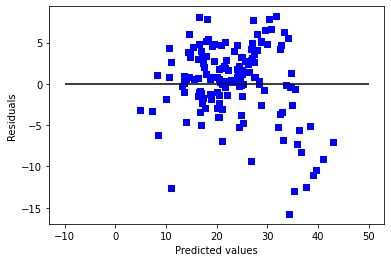

In [ ]:
residual_plot(y_pred, y_test) #x축은 예측값, y축은 residuals를 보여주고 있음

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred) #평균을 구하는 

19.831323672063125

## Regularized Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
ridge = Ridge(alpha = 1.0) 

In [ ]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [ ]:
mean_squared_error(y_test, y_pred_ridge)

19.80987949611701

In [ ]:
lasso = Lasso(alpha = 1.0)

In [ ]:
lasso.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
mean_squared_error(y_test, y_pred_lasso)

29.89024282935218

In [ ]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [ ]:
elanet.fit(X_train_scaled, y_train)

ElasticNet()

In [ ]:
y_pred_elanet = elanet.predict(X_test_scaled)

In [ ]:
 mean_squared_error(y_test, y_pred_elanet)

31.67152823129687

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df_boston[['LSTAT']].values
y = df_boston['target'].values

In [ ]:
quadratic = PolynomialFeatures(degree=2) 

In [ ]:
cubic = PolynomialFeatures(degree = 3)

In [ ]:
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [ ]:
X_quad

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [ ]:
X_fit = np.arange(X.min(), X.max(),1).reshape(-1,1) #range함수적용

In [ ]:
X_fit

array([[ 1.73],
       [ 2.73],
       [ 3.73],
       [ 4.73],
       [ 5.73],
       [ 6.73],
       [ 7.73],
       [ 8.73],
       [ 9.73],
       [10.73],
       [11.73],
       [12.73],
       [13.73],
       [14.73],
       [15.73],
       [16.73],
       [17.73],
       [18.73],
       [19.73],
       [20.73],
       [21.73],
       [22.73],
       [23.73],
       [24.73],
       [25.73],
       [26.73],
       [27.73],
       [28.73],
       [29.73],
       [30.73],
       [31.73],
       [32.73],
       [33.73],
       [34.73],
       [35.73],
       [36.73],
       [37.73]])

In [ ]:
lr = LinearRegression()

In [ ]:
# Linear Regression
lr = lr.fit(X, y)
y_lin_fit = lr.predict(X_fit)

In [ ]:
# Linear Regression with degree=2
lr = lr.fit(X_quad, y)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))

In [ ]:
# Linear Regression with degress=3
lr = lr.fit(X_cubic, y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))

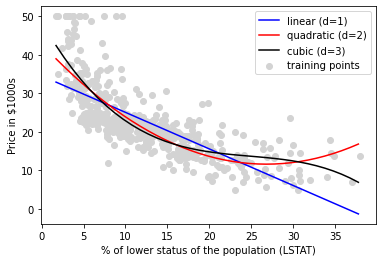

In [ ]:
plt.scatter(X, y, label="training points", color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1)', color='blue', linestyle='-')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2)', color='red', linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3)', color='black', linestyle='-')
plt.xlabel('% of lower status of the population (LSTAT)')
plt.ylabel('Price in $1000s')
plt.legend(loc='upper right')